In [2]:
pip install kneed

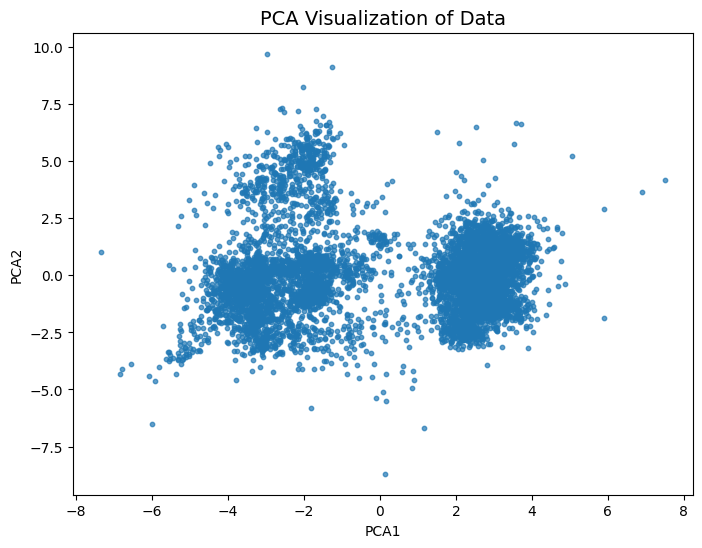

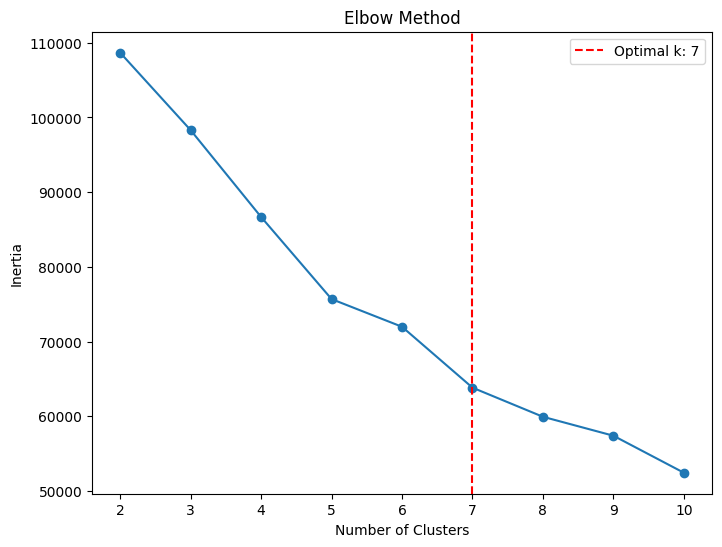

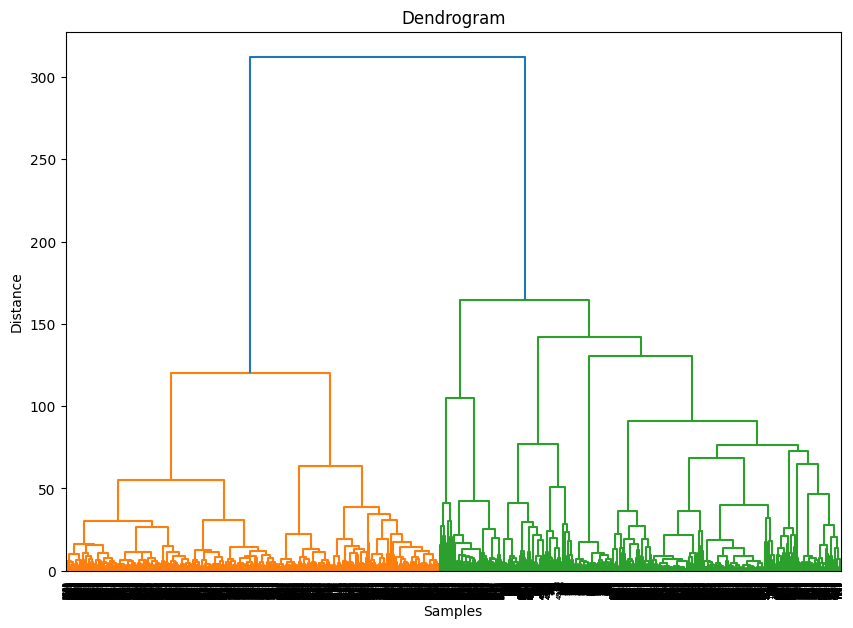

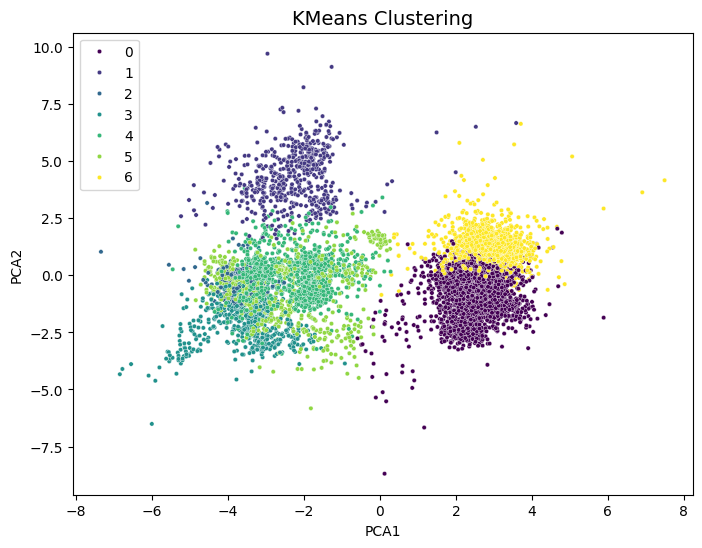

       Model  Silhouette Score  Davies-Bouldin Score
0     KMeans          0.273265              1.573623
1  Hierarchy          0.261456              1.344083
2     DBSCAN         -0.227119              1.775392


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/clusteringweek06.csv')

# Step 1: Data Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: PCA for Visualization (optional)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Visualization of PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], s=10, alpha=0.7)
plt.title('PCA Visualization of Data', fontsize=14)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Step 3: Clustering Pipelines
def clustering_pipeline(data, model, model_name):
    if model_name == "DBSCAN":
        clusters = model.fit_predict(data)
    elif model_name == "Hierarchy":
        clusters = fcluster(model, t=optimal_k, criterion='maxclust')
    else:
        clusters = model.fit(data).labels_

    silhouette = silhouette_score(data, clusters) if len(set(clusters)) > 1 else -1
    davies_bouldin = davies_bouldin_score(data, clusters) if len(set(clusters)) > 1 else -1

    return clusters, silhouette, davies_bouldin

# KMeans Clustering
k_range = range(2, 11)
kmeans_scores = []
kmeans_models = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    kmeans_models.append(kmeans)
    kmeans_scores.append(kmeans.inertia_)

# Elbow Method
knee = KneeLocator(k_range, kmeans_scores, curve="convex", direction="decreasing")
optimal_k = knee.knee

plt.figure(figsize=(8, 6))
plt.plot(k_range, kmeans_scores, marker="o")
plt.axvline(optimal_k, color="red", linestyle="--", label=f"Optimal k: {optimal_k}")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()

# Final KMeans with Optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters, kmeans_silhouette, kmeans_davies_bouldin = clustering_pipeline(data_scaled, kmeans_final, "KMeans")

# Hierarchical Clustering
hierarchy_model = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(hierarchy_model)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

hierarchy_clusters, hierarchy_silhouette, hierarchy_davies_bouldin = clustering_pipeline(data_scaled, hierarchy_model, "Hierarchy")

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters, dbscan_silhouette, dbscan_davies_bouldin = clustering_pipeline(data_scaled, dbscan_model, "DBSCAN")

# Visualization of KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca_df['PCA1'], y=data_pca_df['PCA2'], hue=kmeans_clusters, palette="viridis", s=10)
plt.title("KMeans Clustering", fontsize=14)
plt.show()

# Results Summary
results = pd.DataFrame({
    "Model": ["KMeans", "Hierarchy", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, hierarchy_silhouette, dbscan_silhouette],
    "Davies-Bouldin Score": [kmeans_davies_bouldin, hierarchy_davies_bouldin, dbscan_davies_bouldin]
})

print(results)


Berdasarkan hasil yang diberikan:

1. **Silhouette Score**:
   - **KMeans** memiliki skor tertinggi (0.273265), yang menunjukkan bahwa model ini mampu membentuk cluster yang lebih baik dibandingkan model lainnya.
   - **Hierarchy** memiliki skor sedikit lebih rendah (0.261456), tetapi mendekati KMeans.
   - **DBSCAN** memiliki skor negatif (-0.227119), menunjukkan bahwa model tidak efektif dalam mengelompokkan data untuk parameter yang diberikan.

2. **Davies-Bouldin Score**:
   - **Hierarchy** memiliki skor terbaik (1.344083), yang menunjukkan bahwa cluster yang terbentuk lebih kompak dan terpisah dibandingkan model lainnya.
   - **KMeans** berada di posisi kedua (1.573623), dengan performa yang cukup baik.
   - **DBSCAN** memiliki skor terburuk (1.775392), yang menandakan kualitas cluster yang lebih buruk.

### Kesimpulan
- **Model Terbaik**: **KMeans** dipilih sebagai model terbaik karena memiliki nilai **Silhouette Score tertinggi** (yang lebih signifikan untuk clustering) dan performa yang cukup baik pada **Davies-Bouldin Score**.
- **Hierarchy** dapat dipertimbangkan sebagai alternatif karena memiliki skor Davies-Bouldin yang terbaik, tetapi Silhouette Score-nya sedikit lebih rendah.
- **DBSCAN** kurang cocok untuk dataset ini, mungkin karena parameter default-nya tidak sesuai atau data tidak sesuai untuk model berbasis kepadatan.

Jika clustering yang kompak dan terpisah sangat penting, Anda bisa memilih **Hierarchy**. Namun, jika pemisahan cluster lebih diutamakan, **KMeans** adalah pilihan terbaik.